**Problem Statement** [Assignment](https://drive.google.com/file/d/1w8AvT_awrKDgtw6JHa0KHxf-PiAIkNBR/view?usp=sharing)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from matplotlib.colors import ListedColormap

In [ ]:
goalr = 0
goalc = 9
np.set_printoptions(precision=3)

**Value iteration**

In [ ]:
def genPij(action) :
  Pij = np.zeros((10, 10, 10, 10))
  for i in range(10):
    for j in range(10):
      pij = np.zeros((10,10))
      if i==goalr and j==goalc:
        ;
      elif 10*i + j == 7:
        pij[8][7] = 1
      elif 10*i + j == 90:
        pij[3][2] = 1/4
        pij[4][2] = 1/4
        pij[5][2] = 1/4
        pij[6][2] = 1/4
      else:
        pij = np.zeros((12,12))
        pij[i+action[i][j][0]+1][j+action[i][j][1]+1] = 0.8
        pij[i-action[i][j][0]+1][j-action[i][j][1]+1] = 0.2/3
        pij[i-action[i][j][1]+1][j-action[i][j][0]+1] = 0.2/3
        pij[i+action[i][j][1]+1][j+action[i][j][0]+1] = 0.2/3
        for k in range(10):
          pij[1][k+1] += pij[0][k+1]
          pij[k+1][1] += pij[k+1][0]
          pij[10][k+1] += pij[11][k+1]
          pij[k+1][10] += pij[k+1][11]
        pij = pij[1:11, 1:11]
      Pij[i][j] = pij;
  return Pij

In [ ]:
Pij = np.zeros((4, 10, 10, 10, 10))
right = np.zeros((10, 10, 2))
right[:,:,0] = 0
right[:,:,1] = 1
Pij[0] = genPij(right.astype(int))

left = np.zeros((10, 10, 2))
left[:,:,0] = 0
left[:,:,1] = -1
Pij[1] = genPij(left.astype(int))

down = np.zeros((10, 10, 2))
down[:,:,0] = 1
down[:,:,1] = 0
Pij[2] = genPij(down.astype(int))

up = np.zeros((10, 10, 2))
up[:,:,0] = -1
up[:,:,1] = 0
Pij[3] = genPij(up.astype(int))

In [ ]:
cost = np.zeros((10, 10, 10, 10))
for i in range(10):
  for j in range(10):
    cost[i][j][goalr][goalc] = -10
actionspace = np.zeros((4, 2))
actionspace[0] = [0,1]
actionspace[1] = [0,-1]
actionspace[2] = [1,0]
actionspace[3] = [-1,0]
actionspace = actionspace.astype(int)

In [ ]:
alpha = 0.7

In [ ]:
J = np.zeros((31, 10, 10))
policy = np.zeros((31, 10, 10, 2))
for i in range(10):
  for j in range(10):
    policy[0][i][j] = actionspace[3]
for i in range(30):
  for statex in range(10):
    for statey in range(10):
      tempJ = np.zeros((4))
      for action in range(4):
        for nstatex in range(10):
          for nstatey in range(10):
            tempJ[action] += Pij[action][statex][statey][nstatex][nstatey]*(cost[statex][statey][nstatex][nstatey]+alpha*J[i][nstatex][nstatey])
      J[i+1][statex][statey] = np.amin(tempJ)
      policy[i+1][statex][statey] = actionspace[np.argmin(tempJ)]

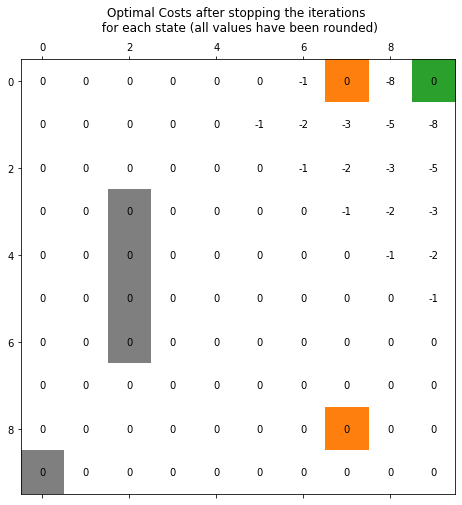

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
JN=J[30]
K = np.zeros((10,10))
K[0][9] = 2
K[9][0] = 1
K[3:7,2] = 1
K[0][7] = 3
K[8][7] = 3
cmap = ListedColormap(['w', 'tab:gray', 'tab:green', 'tab:orange'])
ax.matshow(K,cmap=cmap)
for i in range(10):
    for j in range(10):
        c = int(JN[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title('Optimal Costs after stopping the iterations \n for each state (all values have been rounded)')
plt.show()

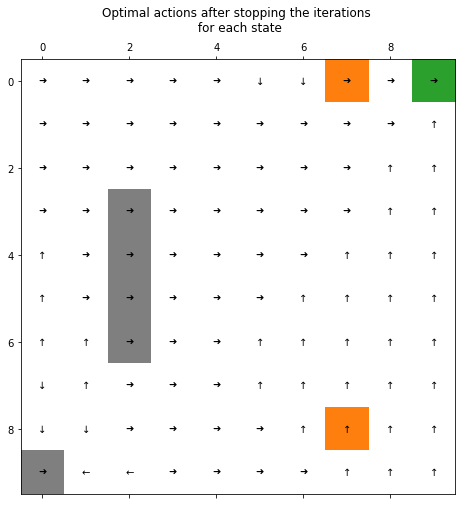

In [ ]:
arrow={-10:'↑',10:'↓',1:'➜',-1:'←'}
arrow_arr=(np.zeros((10,10))).astype(str)
for i in range(10):
  for j in range(10):
    arrow_arr[i][j] = arrow[10*policy[30,i,j,0]+policy[30,i,j,1]]
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
JN=J[30]
ax.matshow(K, cmap=cmap)
for i in range(10):
    for j in range(10):
        c = (arrow_arr[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title('Optimal actions after stopping the iterations \n for each state')
plt.show()

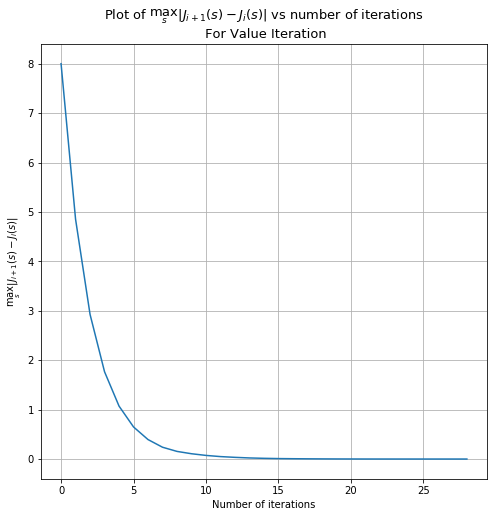

In [ ]:
maxarr=[]
for i in range(29):
    maxarr.append(np.max(np.abs(J[i+1]-J[i])))
plt.plot(maxarr)
plt.grid()
plt.title('Plot of $\max_s | J_{i+1}(s)-J_i(s)|$ vs number of iterations \n For Value Iteration',fontsize=13)
plt.xlabel('Number of iterations')
plt.ylabel('$\max_s | J_{i+1}(s)-J_i(s)|$')
plt.show()

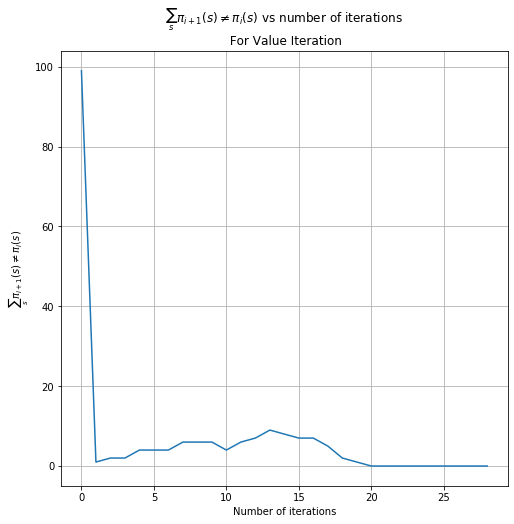

In [ ]:
numneq=[]
for i in range(29):
  temp = 0
  for statex in range(10):
    for statey in range(10):
      a = policy[i][statex][statey] != policy[i+1][statex][statey]
      a = a[0] or a[1]
      temp += a
  numneq.append(temp)
plt.plot(numneq)
plt.grid()
plt.title(r'$\sum_s \pi_{i+1}(s) \neq \pi_{i}(s) $ vs number of iterations'+' \n For Value Iteration')
plt.xlabel('Number of iterations')
plt.ylabel(r'$\sum_s \pi_{i+1}(s) \neq \pi_{i}(s)$')
plt.show()

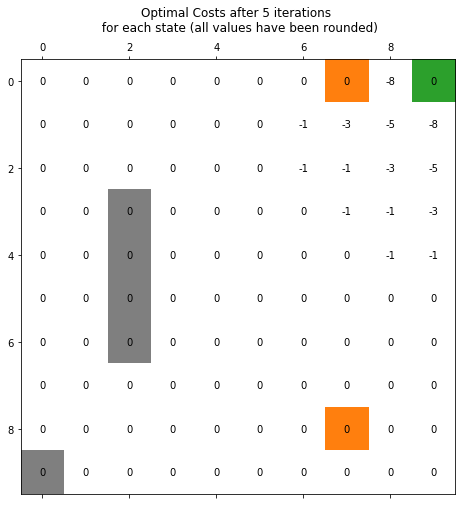

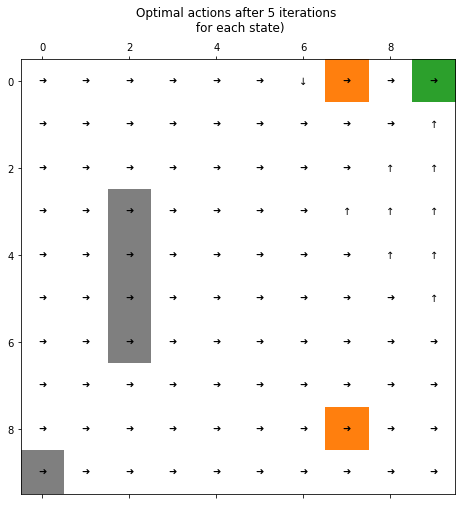

In [ ]:

plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
JN=J[5]
ax.matshow(K, cmap = cmap)
for i in range(10):
    for j in range(10):
        c = int(JN[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title('Optimal Costs after 5 iterations \n for each state (all values have been rounded)')
plt.show()


arrow={-10:'↑',10:'↓',1:'➜',-1:'←'}

arrow_arr=(np.zeros((10,10))).astype(str)
for i in range(10):
  for j in range(10):
    arrow_arr[i][j] = arrow[10*policy[5,i,j,0]+policy[5,i,j,1]]

arrow_arr=np.reshape(np.array(arrow_arr),(10,10))
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
JN=J[5]
ax.matshow(K, cmap = cmap)
for i in range(10):
    for j in range(10):
        c = (arrow_arr[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title('Optimal actions after 5 iterations \n for each state)')
plt.show()

**Policy iteration**

In [ ]:
Jp = []
policy0 = np.zeros((10, 10))
policyp=[]
for i in range(10):
  for j in range(10):
    policy0[i][j] = 3
policyp.append(policy0.astype(int))
i = 0
while i<=30 :
  A = np.zeros((100,100))
  b = np.zeros((100,1))
  for statex in range(10):
    for statey in range(10):
      A[10*statex + statey][10*statex + statey] = 1
      for nstatex in range(10):
        for nstatey in range(10):
          A[10*statex + statey][10*nstatex + nstatey] += -Pij[policyp[i][statex][statey]][statex][statey][nstatex][nstatey]*alpha
          b[10*statex + statey] += Pij[policyp[i][statex][statey]][statex][statey][nstatex][nstatey]*cost[statex][statey][nstatex][nstatey]
  tempJ = np.linalg.solve(A,b)
  Jp.append(np.reshape(tempJ,(10,10)))
  temppolicy = np.zeros((10, 10))
  for statex in range(10):
    for statey in range(10):
      tempJ = np.zeros((4))
      for action in range(4):
        for nstatex in range(10):
          for nstatey in range(10):
            tempJ[action] += Pij[action][statex][statey][nstatex][nstatey]*(cost[statex][statey][nstatex][nstatey]+alpha*Jp[i][nstatex][nstatey])
      temppolicy[statex][statey] = np.argmin(tempJ)
  policyp.append(temppolicy.astype(int))
  i = i + 1
  #if np.all(policyp[i]==policyp[i-1]) :
    #break
niter = i

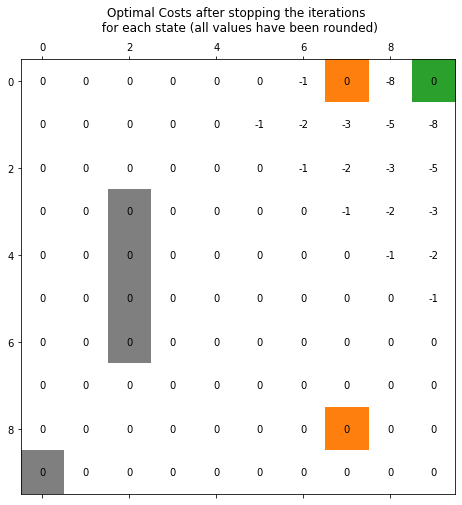

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
JN=np.array(Jp[-1])
ax.matshow(K, cmap = cmap)
for i in range(10):
    for j in range(10):
        c = int(JN[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title('Optimal Costs after stopping the iterations \n for each state (all values have been rounded)')
plt.show()

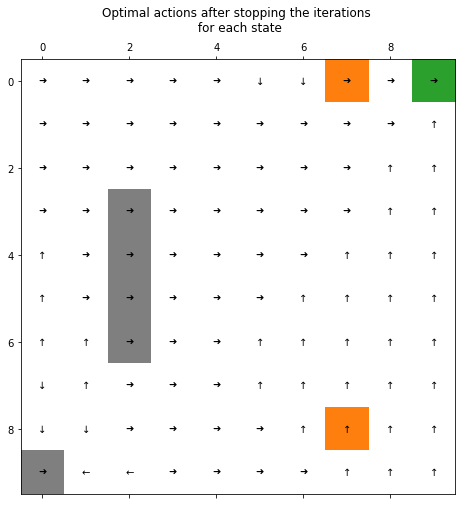

In [ ]:
arrow={3:'↑',2:'↓',0:'➜',1:'←'}
arrow_arr=(np.zeros((10,10))).astype(str)
for i in range(10):
  for j in range(10):
    arrow_arr[i][j] = arrow[policyp[-1][i][j]]
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
JN=Jp[-1]
ax.matshow(K, cmap = cmap)
for i in range(10):
    for j in range(10):
        c = (arrow_arr[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title('Optimal actions after stopping the iterations \n for each state')
plt.show()

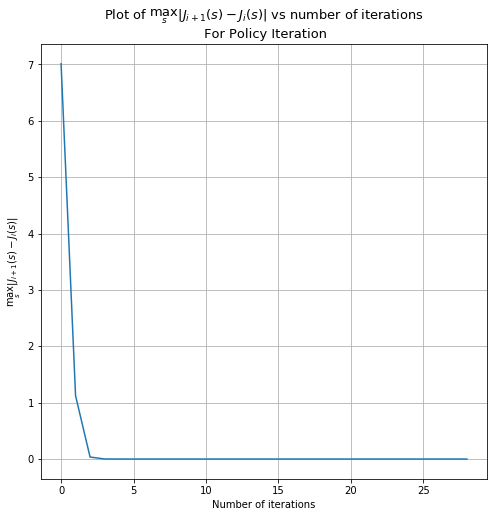

In [ ]:
maxarr=[]
for i in range(29):
    maxarr.append(np.max(np.abs(Jp[i+1]-Jp[i])))
plt.plot(maxarr)
plt.grid()
plt.title('Plot of $\max_s | J_{i+1}(s)-J_i(s)|$ vs number of iterations \n For Policy Iteration',fontsize=13)
plt.xlabel('Number of iterations')
plt.ylabel('$\max_s | J_{i+1}(s)-J_i(s)|$')
plt.show()

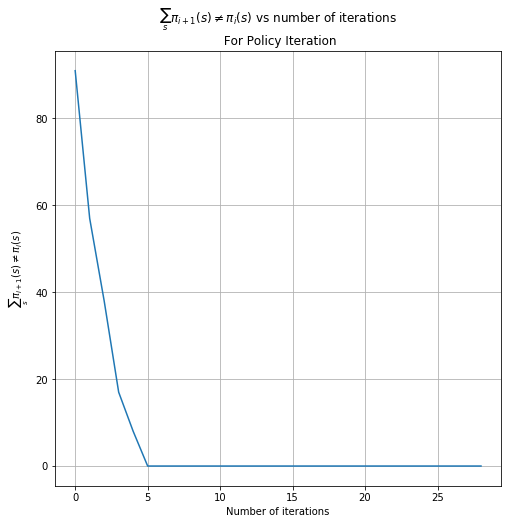

In [ ]:
numneq=[]
for i in range(29):
  temp = 0
  for statex in range(10):
    for statey in range(10):
      a = policyp[i][statex][statey] != policyp[i+1][statex][statey]
      temp += a
  numneq.append(temp)
plt.plot(numneq)
plt.grid()
plt.title(r'$\sum_s \pi_{i+1}(s) \neq \pi_{i}(s) $ vs number of iterations'+' \n For Policy Iteration')
plt.xlabel('Number of iterations')
plt.ylabel(r'$\sum_s \pi_{i+1}(s) \neq \pi_{i}(s)$')
plt.show()

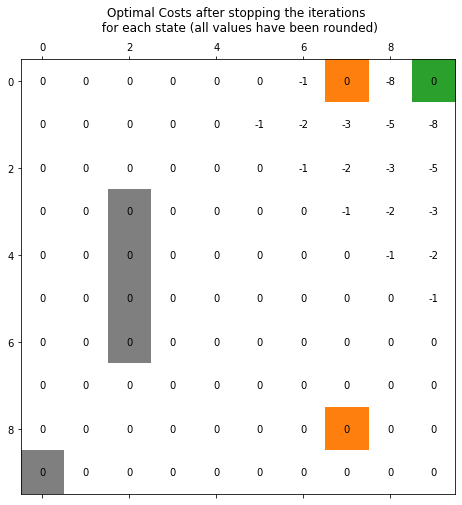

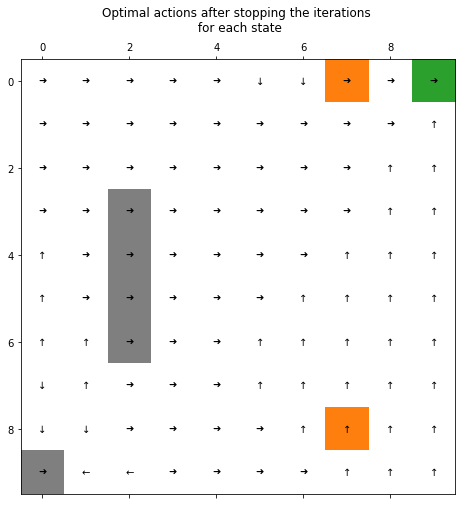

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
JN=np.array(Jp[4])
ax.matshow(K, cmap = cmap)
for i in range(10):
    for j in range(10):
        c = int(JN[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title('Optimal Costs after stopping the iterations \n for each state (all values have been rounded)')
plt.show()

arrow={3:'↑',2:'↓',0:'➜',1:'←'}
arrow_arr=(np.zeros((10,10))).astype(str)
for i in range(10):
  for j in range(10):
    arrow_arr[i][j] = arrow[policyp[5][i][j]]
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
JN=Jp[4]
ax.matshow(K, cmap = cmap)
for i in range(10):
    for j in range(10):
        c = (arrow_arr[j,i])
        ax.text(i, j, str(c), va='center', ha='center')
plt.title('Optimal actions after stopping the iterations \n for each state')
plt.show()

Explanation of policy obtained by Value iteration and Policy iteration:


*   Arrows near goal 1 point towards goal1
*   Arrows near orange IN point away from it as it takes us away from goal1 and orange IN hence has a high cost
*   Arrows near grey IN point towards it as it takes us closer to goal1





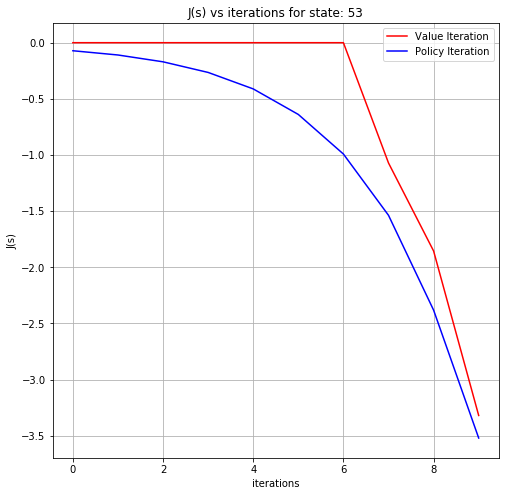

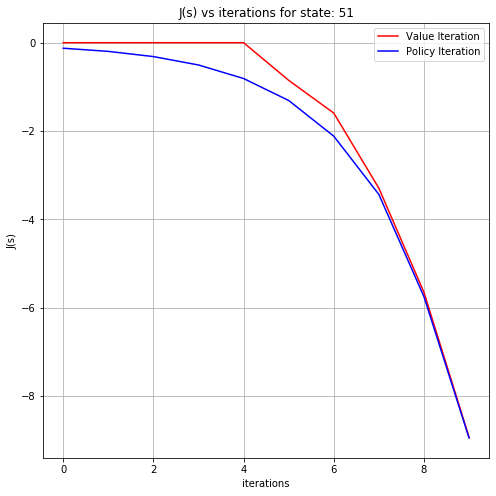

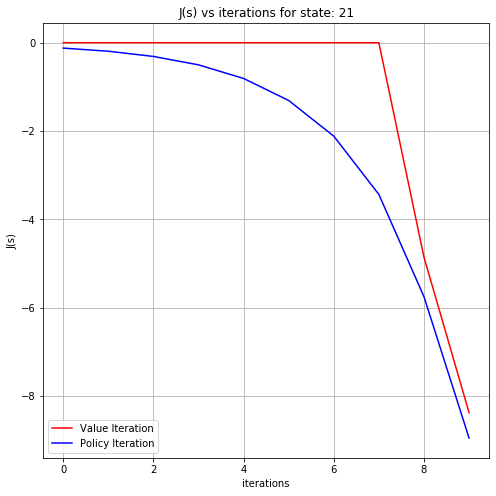

In [ ]:
def plot_curve(i,j):
    plt.plot(J[:][i][j],'r',label='Value Iteration')
    plt.plot(Jp[:][i][j],'b',label='Policy Iteration')
    plt.grid()
    k = 10*i + j
    plt.title('J(s) vs iterations for state: %d' %k)
    plt.xlabel('iterations')
    plt.ylabel('J(s)')
    plt.legend()
    plt.show()
plot_curve(5,3)
plot_curve(5,1)
plot_curve(2,1)

As we can see above, Policy iteration converges faster than Value iteration.
This is because theoretically Value iteration requires infinite steps to converge but Policy iteration converges in finite steps.

Value iteration and policy iteration with goal 2 as the terminal state is in a seperate python notebook sent by mail.